# **Atenção**:
Nessa atividade vamos utilizar o seaborn para criar gráficos, para isso precisamos garantir que a última versão esteja atualizada, por isso usamos o comando abaixo para instalá-la.

In [129]:
!pip3 install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Também vamos precisar do scikit-learn para criar modelos de ML e subsets de treino e teste, para isso, precisamos do comando abaixo para instala-la também.

In [130]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **LAB 03 - Aprendizado Supervisionado - Regressão**

## Objetivos

  - Apresentar o conceito de Regressão
  - Apresentar e utilizar algoritmo de Regressão linear
  - Apresentar e utilizar Regressão Polinomial
  - Apresentar e discutir a matriz de correlação
  - Apresentar uma intuição sobre métricas de avaliação (MSE, RMSE e $ R² $ )


## **Como funciona a Regressão Linear?**

É uma técnica que consiste em representar um conjunto de dados por meio de uma reta.


    Na matemática aprendemos que a equação de uma reta é:

$$
Y = A + BX \\
$$
A e B são constantes que determinam a posição e inclinação da reta. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão linear é:

$$
Y_{predito} = \beta_o + \beta_1X \\
$$

$ \beta_o $ e $ \beta_1 $ são parâmetros que determinam o peso e bias da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.

<img src="https://github.com/toyusan/aula-fiap-disruptive-archs/blob/f297035215144c36b0c7b282396e403e1d3956e4/Aula%2005/Linha%20de%20tendencia.PNG?raw=1">

Essa ideia se estende para mais de um parâmetro independente, mas nesse caso não estamos associando a uma reta e sim a um plano ou hiperplano:

$$
Y_{predito} = \beta_o + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n\\
$$

<img src="https://github.com/toyusan/aula-fiap-disruptive-archs/blob/f297035215144c36b0c7b282396e403e1d3956e4/Aula%2005/hiperplano.PNG?raw=1">

Em outras palavras, modelos de regressão linear são intuitivos, fáceis de interpretar e se ajustam aos dados razoavelmente bem em muitos problemas.

## **Definição do Problema**

Desenvolver um sistema de machine learning capaz de predizer o valor de um imóvel na California.

Para isso, vamos usar o dataset de informações do U.S. Census Sevice sobre habitação no estado da Californai, disponível no scikit-learn, e para isso vamos precisar importa-lo da seguinte forma:

**from sklearn.datasets import fetch_california_housing**

**dataset = fetch_california_housing()**


### **1** - Do Ponto de vista de Machine Learning, qual a classificação desse problema?

Resposta: É um problema de treinamento supervisionado da categoria de regressão, pois queremos estimar um valor numérico.

### **2** - Carregue o Dataset e inspecione suas caracteristicas com o método **keys()**. O que podemos concluir sobre ele?

In [131]:
#Sua resposta aqui

# Dizendo para o Jupyter abrir os gráficos nesta janela!
%matplotlib inline 

# Inicializção das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

#para conhecer o que foi importado do dataset 
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [132]:
dataset.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

### **3** - Agora transforme esse dataset em um objeto do pandas, fazendo os ajustes necessários de cabeçalho. Em seguida verifique suas caracteristicas com o método **info()**

In [133]:
#Sua resposta aqui
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [135]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### **4** - Note que o dataset carregado pelo pandas não tem a coluna target, que é justamente o preço das casas, e a informação que queremos que nosso modelo predite. Precisamos inclui-la neste dataset. Em seguida use os métodos **info** e **describe** novamente para verificar o que mudou.

In [136]:
#Sua resposta aqui
df['Price'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [138]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### **5** - Agora precisamos analisar os dados e tentar entender como eles se relacionam. Para isso, vamos usar uma matriz de correlação e tentar responder:

 - Qual feature possui a maior correlação **positiva** com o target?

 - Qual feature possui a maior correlação **negativa** com o target?

<AxesSubplot:>

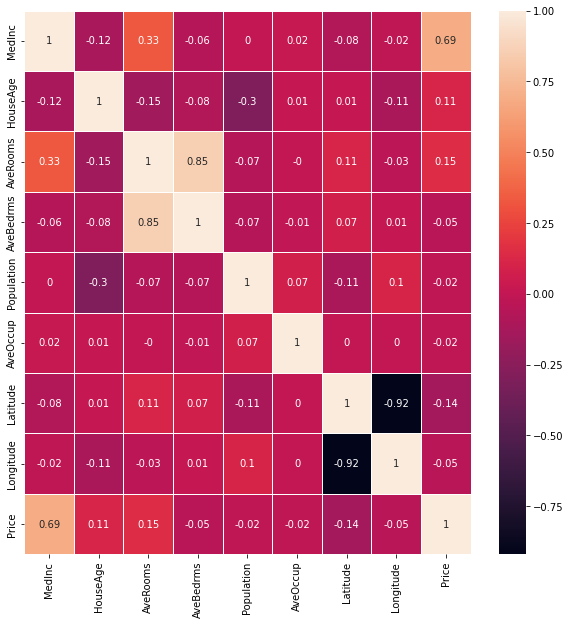

In [139]:
#Sua resposta

import seaborn as sns 
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Resposta: 

<AxesSubplot:xlabel='AveRooms', ylabel='Price'>

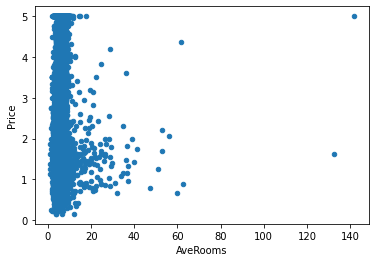

In [140]:
df.plot.scatter('AveRooms', 'Price')

<AxesSubplot:xlabel='HouseAge', ylabel='Price'>

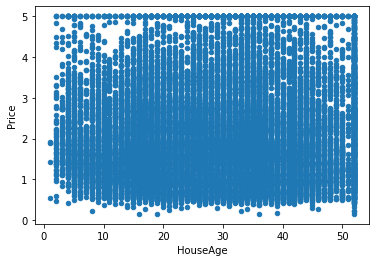

In [141]:
df.plot.scatter('HouseAge', 'Price')

<AxesSubplot:xlabel='MedInc', ylabel='Price'>

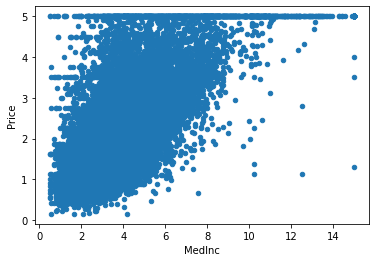

In [142]:
df.plot.scatter('MedInc', 'Price')

### **6** - Agora que você identificou uma correlação vamos nos preparar para implementar o modelo. Primeiro temos que criar um novo dataset, somente com os dados que vamos utilizar, aqueles que identificamos a correlação.

Obs: Lembre-se que estamos começando o projeto do nosso modelo, então precisamos criar duas "tabelas", uma com os atributos (entradas) e outra com a classificação (classe).

In [143]:
#Sua resposta aqui

# Vamos treinar nosso modelo com 2 dois atributos independentes

# para predizer o valor de saida
#X = df[['MedInc', 'HouseAge','AveRooms']]   ### teste com as entradas de correlação mais positivas
#X = df[['MedInc']]                          ### teste com uma entrada de maior correlação
X = df.drop(['Price'], axis=1)              ### teste com todas as entradas

Y = df['Price']             
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (20640, 8) e saidas (20640,)


### **7 -** Com os dois suconjuntos criados precisamos separa-los em Treino e Teste! 

Normalmente usamos 80% do Dataset para Treino e 20% para Teste, e para isso, vamos usar o **Scikit-Learn** com a função **train_test_split()**. Ele vai pegar o nosso dataset e fazer essa separação de forma aleatória.

Para eliminarmos essa aleatoriedade, vamos fixar a semente do algoritmo de geração de números randomicos da biblioteca, usando **random_state = 42**

In [144]:
#Sua resposta aqui
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [145]:
X_treino.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [146]:
Y_treino.head()

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: Price, dtype: float64

### **8 -** Agora vamos treinar o nosso modelo baseado no Algoritmo de Regressão Linear!

Treinar um modelo no python é simples se usar o Scikit-Learn e treinar um modelo é mais simples ainda: basta criar o classificador, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do scikit-learn:

* O método fit(X,Y) recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros;
* O método predict(X) recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes;
* Não esqueça de importar as bibliotécas com "from sklearn.linear_model import LinearRegression";

In [147]:
#Sua resposta aqui
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão 
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)


LinearRegression()

## **9 -** Agora que temos o modelo treinado, vamos testar!

Para testar o modelo, vamos usar o método predict() com os dados de teste que separamos.

In [148]:
#Sua resposta aqui
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

Predição usando regressão, retorna valores continuos: [0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


### **10 -** Lembre-se que a regressão linear aproxima os dados para uma reta, por isso esse modelo pode nos retornar o coeficiente angular e o coeficiente linear usado nas prediçoes!

In [149]:
#Sua resposta aqui

# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else: 
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  -37.02327770606409
(B) Inclinação:  [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Nossa equação é: Y_pred = -37.02 + 0.45 * X_LSTAT + 0.01 * X_RM


Text(0, 0.5, 'Valor Predito')

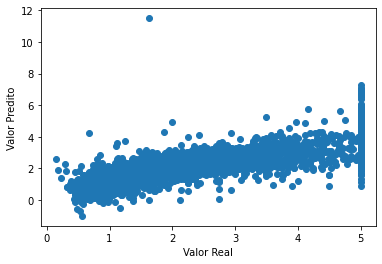

In [150]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

### **11 -** Por fim, vamos avaliar o modelo treinado colocando algumas valores e ver como ele se comporta baseado nas métricas

In [151]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 2295 
Erro Quadrático Médio (MSE): 0.56
Erro Médio Absoluto (MAE): 0.53
Raiz do Erro Quadrático Médio (RMSE): 0.75 
R2-score: 0.34


## **Como funciona a Regressão Polinomial?**

$$
Y = A + BX + C X² \\
$$
A, B e C são constantes que determinam a posição e inclinação da curva, o 2 indica o grau do polinômio. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão Polinomial é:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² \\
$$

$ \beta_o $ , $ \beta_1 $ e $ \beta_2 $ são parâmetros que determinam o peso da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.


Essa ideia se estende para polinômio de graus maiores:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² + ... + \beta_nX^n\\
$$

### **12** Agora vamos usar a técnica de regressão Polinomial!

Soma dos Erros ao Quadrado (SSE): 16519 
Erro Quadrático Médio (MSE): 550.63
Erro Médio Absoluto (MAE): 18.81
Raiz do Erro Quadrático Médio (RMSE): 23.47 
R2-score: 0.99


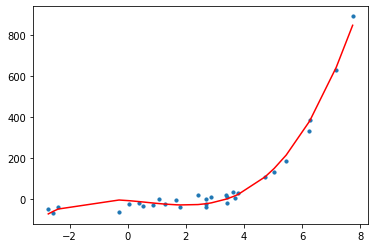

In [152]:
import operator
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#####----------- vou gerar alguns numeros aleatórios ------------------

#gerando numeros aleatorios, apenas para este exemplo
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3)+ 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)

# ajuste nos dados, pois estamos trabalhando com a numpy 
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#----É aqui que o seu código muda ------------------------------------

# Chama a função definindo o grau do polinomio e aplica o modelo

grau_poly = 3
polynomial_features= PolynomialFeatures(degree = grau_poly)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='r')
plt.show()